# Not-just-1D-2D Graph Visualization

## 1. Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl
import numpy as np
import seaborn as sns
%matplotlib inline

## 2. Read, Transform, Display some data

In [2]:
red_wine = pd.read_csv('/winequality-red.csv', sep=';')
white_wine = pd.read_csv('/winequality-white.csv', sep=';')

# store wine type as an attribute
red_wine['wine_type'] = 'red'
white_wine['wine_type'] = 'white'

# bucket wine quality scores into qualitative quality labels
red_wine['quality_label'] = red_wine['quality'].apply(lambda value: 'low' 
                                                          if value <= 5 else 'medium' 
                                                              if value <= 7 else 'high')
red_wine['quality_label'] = pd.Categorical(red_wine['quality_label'], 
                                           categories=['low', 'medium', 'high'])
white_wine['quality_label'] = white_wine['quality'].apply(lambda value: 'low' 
                                                              if value <= 5 else 'medium' 
                                                                  if value <= 7 else 'high')
white_wine['quality_label'] = pd.Categorical(white_wine['quality_label'], 
                                             categories=['low', 'medium', 'high'])

# merge red and white wine datasets
wines = pd.concat([red_wine, white_wine])

# re-shuffle records just to randomize data points
wines = wines.sample(frac=1, random_state=42).reset_index(drop=True)

In [3]:
wines.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type,quality_label
0,7.0,0.17,0.74,12.8,0.045,24.0,126.0,0.99420,3.26,0.38,12.2,8,white,high
1,7.7,0.64,0.21,2.2,0.077,32.0,133.0,0.99560,3.27,0.45,9.9,5,red,low
2,6.8,0.39,0.34,7.4,0.020,38.0,133.0,0.99212,3.18,0.44,12.0,7,white,medium
3,6.3,0.28,0.47,11.2,0.040,61.0,183.0,0.99592,3.12,0.51,9.5,6,white,medium
4,7.4,0.35,0.20,13.9,0.054,63.0,229.0,0.99888,3.11,0.50,8.9,6,white,medium


## 3. Descriptive summary statistics

In [4]:
subset_attributes = ['residual sugar', 'total sulfur dioxide', 'sulphates', 
                     'alcohol', 'volatile acidity', 'quality']
rs = round(red_wine[subset_attributes].describe(),2)
ws = round(white_wine[subset_attributes].describe(),2)

pd.concat([rs, ws], axis=1, keys=['Red Wine Statistics', 'White Wine Statistics'])

Red Wine Statistics                       ... White Wine Statistics         
           residual sugar total sulfur dioxide  ...      volatile acidity  quality
count             1599.00              1599.00  ...               4898.00  4898.00
mean                 2.54                46.47  ...                  0.28     5.88
std                  1.41                32.90  ...                  0.10     0.89
min                  0.90                 6.00  ...                  0.08     3.00
25%                  1.90                22.00  ...                  0.21     5.00
50%                  2.20                38.00  ...                  0.26     6.00
75%                  2.60                62.00  ...                  0.32     6.00
max                 15.50               289.00  ...                  1.10     9.00

[8 rows x 12 columns]

## 4. Univariate Analysis

#### 4.1. Histogram

In [ ]:
wines.hist(bins=15, color='steelblue', edgecolor='black', linewidth=1.0,
           xlabelsize=8, ylabelsize=8, grid=False)    
plt.tight_layout(rect=(0, 0, 1.2, 1.2))   

#### 4.2. Density Plot

In [ ]:
# Histogram
fig = plt.figure(figsize = (6,4))
title = fig.suptitle("Sulphates Content in Wine", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

ax = fig.add_subplot(1,1, 1)
ax.set_xlabel("Sulphates")
ax.set_ylabel("Frequency") 
ax.text(1.2, 800, r'$\mu$='+str(round(wines['sulphates'].mean(),2)), 
         fontsize=12)
freq, bins, patches = ax.hist(wines['sulphates'], color='steelblue', bins=15,
                                    edgecolor='black', linewidth=1)
                                    

# Density Plot
fig = plt.figure(figsize = (6, 4))
title = fig.suptitle("Sulphates Content in Wine", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

ax1 = fig.add_subplot(1,1, 1)
ax1.set_xlabel("Sulphates")
ax1.set_ylabel("Frequency") 
sns.kdeplot(wines['sulphates'], ax=ax1, shade=True, color='steelblue')

In [ ]:
# Bar Plot
fig = plt.figure(figsize = (6, 4))
title = fig.suptitle("Wine Quality Frequency", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

ax = fig.add_subplot(1,1, 1)
ax.set_xlabel("Quality")
ax.set_ylabel("Frequency") 
w_q = wines['quality'].value_counts()
w_q = (list(w_q.index), list(w_q.values))
ax.tick_params(axis='both', which='major', labelsize=8.5)
bar = ax.bar(w_q[0], w_q[1], color='steelblue', 
        edgecolor='black', linewidth=1)

## 5. Multivariate Analysis

Check out distributions, relationships, patterns and correlations amongst attributes.

### 5.1 Two-D

#### 5.1.1 Heatmap

Best for correlations.

In [ ]:
# Correlation Matrix Heatmap
f, ax = plt.subplots(figsize=(20, 10))
corr = wines.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Wine Attributes Correlation Heatmap', fontsize=14)

#### 5.1.2 Scatter Plots

In [ ]:
# Pair-wise Scatter Plots
cols = ['density', 'residual sugar', 'total sulfur dioxide', 'fixed acidity']
pp = sns.pairplot(wines[cols], height=1.8, aspect=1.8,
                  plot_kws=dict(edgecolor="k", linewidth=0.5),
                  diag_kind="kde", diag_kws=dict(shade=True))

fig = pp.fig 
fig.subplots_adjust(top=0.93, wspace=0.3)
t = fig.suptitle('Wine Attributes Pairwise Plots', fontsize=14)

#### 5.1.3 Parallel Coordinates

A vertical line is an attribute. One complete set of connected line segments across all the attributes represents one data point.

1. Density attribute: Red wines win

2. Residual sugar, Total sulfur dioxide attribute: White wines win

3. Fixed acidity: Red wines win

In [ ]:
# Scaling attribute values to avoid few outiers
cols = ['density', 'residual sugar', 'total sulfur dioxide', 'fixed acidity']
subset_df = wines[cols]

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

scaled_df = ss.fit_transform(subset_df)
scaled_df = pd.DataFrame(scaled_df, columns=cols)
final_df = pd.concat([scaled_df, wines['wine_type']], axis=1)
final_df.head()

# plot parallel coordinates
from pandas.plotting import parallel_coordinates
pc = parallel_coordinates(final_df, 'wine_type', color=('#FFE888', '#FF9999'))

#### 5.1.4 Scatter and Joint plots

For numeric attributes.

Joint plots: Draw two graphs (bivariate and univariate) in one plot.

In [ ]:
# Scatter Plot

plt.scatter(wines['sulphates'], wines['alcohol'],
            alpha=0.4, edgecolors='w')

plt.xlabel('Sulphates')
plt.ylabel('Alcohol')
plt.title('Wine Sulphates - Alcohol Content',y=1.05)


# Joint Plot
jp = sns.jointplot(x='sulphates', y='alcohol', data=wines,
                   kind='reg', space=0, size=5, ratio=4)

#### 5.1.5 Facets

To visualize two different category attributes.

In [ ]:
# Using subplots or facets along with Bar Plots
fig = plt.figure(figsize = (10, 4))
title = fig.suptitle("Wine Type - Quality", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)
# red wine - wine quality
ax1 = fig.add_subplot(1,2, 1)
ax1.set_title("Red Wine")
ax1.set_xlabel("Quality")
ax1.set_ylabel("Frequency") 
rw_q = red_wine['quality'].value_counts()
rw_q = (list(rw_q.index), list(rw_q.values))
ax1.set_ylim([0, 2500])
ax1.tick_params(axis='both', which='major', labelsize=8.5)
bar1 = ax1.bar(rw_q[0], rw_q[1], color='red', 
               edgecolor='black', linewidth=1)

# white wine - wine quality
ax2 = fig.add_subplot(1,2, 2)
ax2.set_title("White Wine")
ax2.set_xlabel("Quality")
ax2.set_ylabel("Frequency") 
ww_q = white_wine['quality'].value_counts()
ww_q = (list(ww_q.index), list(ww_q.values))
ax2.set_ylim([0, 2500])
ax2.tick_params(axis='both', which='major', labelsize=8.5)
bar2 = ax2.bar(ww_q[0], ww_q[1], color='white', 
               edgecolor='black', linewidth=1)

#### 5.1.6 Stacked bars

A shorter code to represent the above two bar graphs

In [ ]:
# Multi-bar Plot
cp = sns.countplot(x="quality", hue="wine_type", data=wines, 
                   palette={"red": "#FF9999", "white": "#FFE888"})

#### 5.1.7 Using Facets and Histograms or Density Plots

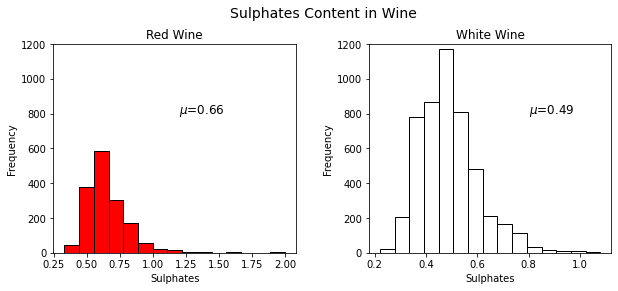

In [25]:
# facets with histograms
fig = plt.figure(figsize = (10,4))
title = fig.suptitle("Sulphates Content in Wine", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

ax1 = fig.add_subplot(1,2, 1)
ax1.set_title("Red Wine")
ax1.set_xlabel("Sulphates")
ax1.set_ylabel("Frequency") 
ax1.set_ylim([0, 1200])
ax1.text(1.2, 800, r'$\mu$='+str(round(red_wine['sulphates'].mean(),2)), 
         fontsize=12)
r_freq, r_bins, r_patches = ax1.hist(red_wine['sulphates'], color='red', bins=15,
                                     edgecolor='black', linewidth=1)

ax2 = fig.add_subplot(1,2, 2)
ax2.set_title("White Wine")
ax2.set_xlabel("Sulphates")
ax2.set_ylabel("Frequency")
ax2.set_ylim([0, 1200])
ax2.text(0.8, 800, r'$\mu$='+str(round(white_wine['sulphates'].mean(),2)), 
         fontsize=12)
w_freq, w_bins, w_patches = ax2.hist(white_wine['sulphates'], color='white', bins=15,
                                     edgecolor='black', linewidth=1)

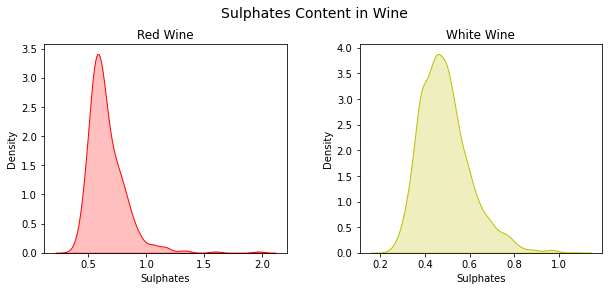

In [26]:
# facets with density plots
fig = plt.figure(figsize = (10, 4))
title = fig.suptitle("Sulphates Content in Wine", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

ax1 = fig.add_subplot(1,2, 1)
ax1.set_title("Red Wine")
ax1.set_xlabel("Sulphates")
ax1.set_ylabel("Density") 
sns.kdeplot(red_wine['sulphates'], ax=ax1, shade=True, color='r')

ax2 = fig.add_subplot(1,2, 2)
ax2.set_title("White Wine")
ax2.set_xlabel("Sulphates")
ax2.set_ylabel("Density") 
sns.kdeplot(white_wine['sulphates'], ax=ax2, shade=True, color='y')

**Combining the two histograms to one**

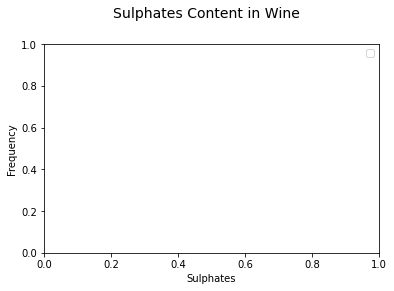

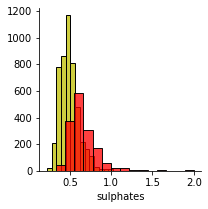

In [39]:
# Using multiple Histograms 
fig = plt.figure(figsize = (6, 4))
title = fig.suptitle("Sulphates Content in Wine", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)
ax = fig.add_subplot(1,1, 1)
ax.set_xlabel("Sulphates")
ax.set_ylabel("Frequency") 

g = sns.FacetGrid(wines, hue='wine_type', palette={"red": "r", "white": "y"})
g.map(sns.histplot, 'sulphates', kde=False, bins=15, ax=ax)
ax.legend('Wine Type')
# plt.close(2)